In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import random
from sklearn.model_selection import train_test_split

In [ ]:
x = np.linspace(0, 2, 100)
er = np.random.random_sample(size=100) / 2 - 0.5

y = np.sin(x ** 2) + er

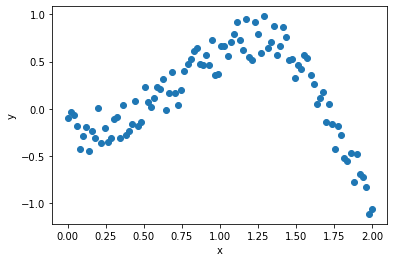

In [ ]:
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
x = x.reshape((x.shape[0], 1))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
models = [SVR(kernel='linear'),
          SVR(kernel='poly', degree=3),
          SVR(kernel='rbf')]

models = [GridSearchCV(models[0], param_grid={'C':np.logspace(-3, 3, 7)}),
          GridSearchCV(models[1], param_grid={'C':np.logspace(-3, 3, 7)}),
          GridSearchCV(models[2], param_grid={'C':np.logspace(-3, 3, 7),
                                              'gamma': np.logspace(-2, 2, 5)})]
models = [model.fit(x_train, y_train) for model in models]

titles = ['SVR with linear kernel',
          'SVR with 3-degree polynomial kernel',
          'SVR with RBF kernel']
for i in range(3):
  print(titles[i] + ':')
  print(' best params are:', models[i].best_params_)

SVR with linear kernel:
 best params are: {'C': 0.001}
SVR with 3-degree polynomial kernel:
 best params are: {'C': 0.001}
SVR with RBF kernel:
 best params are: {'C': 1000.0, 'gamma': 1.0}


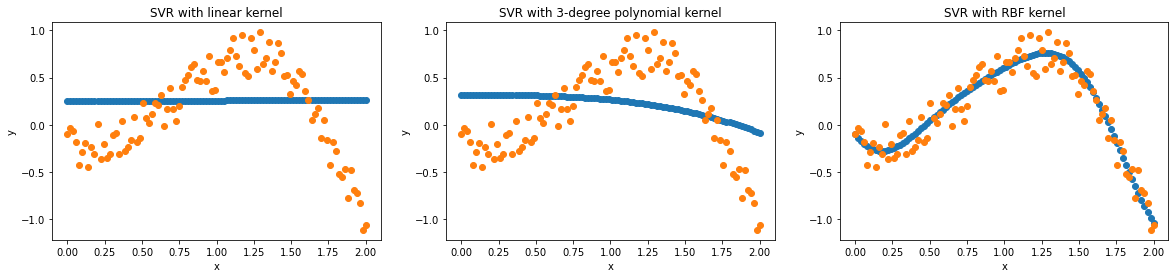

SVR with RBF kernel:
train accuracy:
-0.023604651067528737
test accuracy:
-0.24908230623721184

SVR with RBF kernel:
train accuracy:
0.1109514637117186
test accuracy:
-0.08402418633594055

SVR with RBF kernel:
train accuracy:
0.9264862423651359
test accuracy:
0.899529605784097



In [ ]:
fig, sub = plt.subplots(1,3,  figsize=(20, 4))
plt.subplots_adjust(wspace=0.2, hspace=0.2)

for clf, title, ax in zip(models, titles, sub.flatten()):
  ax.scatter(x, clf.predict(x))
  ax.scatter(x, y)
  ax.set_title(title)
  ax.set_xlabel('x')
  ax.set_ylabel('y')
plt.show()

for i in range(3):
  print(title + ':')
  print('train accuracy:')
  print(models[i].score(x_train, y_train))
  print('test accuracy:')
  print(models[i].score(x_test, y_test))
  print()